In [1]:
from pymol import cmd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
overall_DF = pd.read_csv("overall_result.csv")
# avaiable_DF = overall_DF[overall_DF[["A501_structure_status","3DAC_structure_status"]].all(axis=1)]
# avaiable_DF.to_csv("available_result.csv")
avaiable_DF = pd.read_csv("available_result.csv")

In [3]:
rmsd_list = []
for i in range(avaiable_DF.shape[0]):
    cmd.load("A501/A501_summary/%s/relaxed_model_1.pdb"%avaiable_DF["A501_sequence_id"][i],"%s_1"%avaiable_DF["A501_sequence_id"][i])
    cmd.load("3DAC/3DAC_summary/%s/relaxed_model_1.pdb"%avaiable_DF["3DAC_sequence_id"][i],"%s_1"%avaiable_DF["3DAC_sequence_id"][i])
    rmsd_list.append(cmd.align("%s"%avaiable_DF["A501_sequence_id"][i],"%s"%avaiable_DF["3DAC_sequence_id"][i],cycles=5)[0])

    cmd.reinitialize()

avaiable_DF["RMSD"] = rmsd_list

 PyMOL not running, entering library mode (experimental)


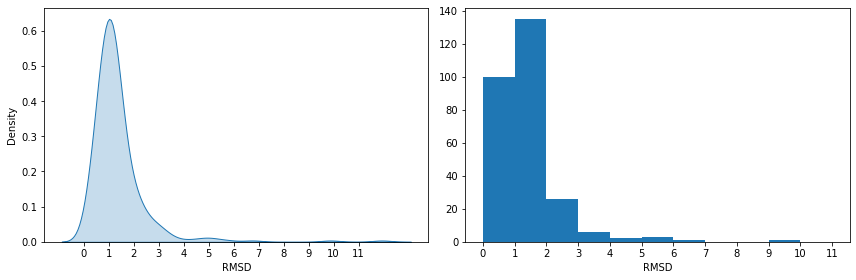

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.kdeplot(avaiable_DF["RMSD"],shade=True,zorder=1)
plt.xticks(list(np.arange(0,12,1)))

plt.subplot(122)
plt.hist(avaiable_DF["RMSD"],bins=np.arange(0,12,1),zorder=2)
plt.xticks(list(np.arange(0,12,1)))
plt.xlabel("RMSD")

plt.tight_layout()
plt.savefig("Figure/RMSD.png",dpi=300)

In [5]:
avaiable_DF.to_csv("available_result.csv",index=False)

In [6]:
rmsd_list_A501_inside = []
for i in range(avaiable_DF.shape[0]):
    cmd.load("A501/A501_summary/%s/relaxed_model_1.pdb"%avaiable_DF["A501_sequence_id"][i],"%s_1"%avaiable_DF["A501_sequence_id"][i])
    cmd.load("A501/A501_summary/%s/relaxed_model_2.pdb"%avaiable_DF["A501_sequence_id"][i],"%s_2"%avaiable_DF["A501_sequence_id"][i])
    rmsd_list_A501_inside.append(cmd.align("%s_1"%avaiable_DF["A501_sequence_id"][i],"%s_2"%avaiable_DF["A501_sequence_id"][i],cycles=5)[0])

    cmd.reinitialize()



In [7]:
rmsd_list_3DAC_inside = []
for i in range(avaiable_DF.shape[0]):
    cmd.load("3DAC/3DAC_summary/%s/relaxed_model_1.pdb"%avaiable_DF["3DAC_sequence_id"][i],"%s_1"%avaiable_DF["3DAC_sequence_id"][i])
    cmd.load("3DAC/3DAC_summary/%s/relaxed_model_2.pdb"%avaiable_DF["3DAC_sequence_id"][i],"%s_2"%avaiable_DF["3DAC_sequence_id"][i])
    rmsd_list_3DAC_inside.append(cmd.align("%s_1"%avaiable_DF["3DAC_sequence_id"][i],"%s_2"%avaiable_DF["3DAC_sequence_id"][i],cycles=5)[0])

    cmd.reinitialize()



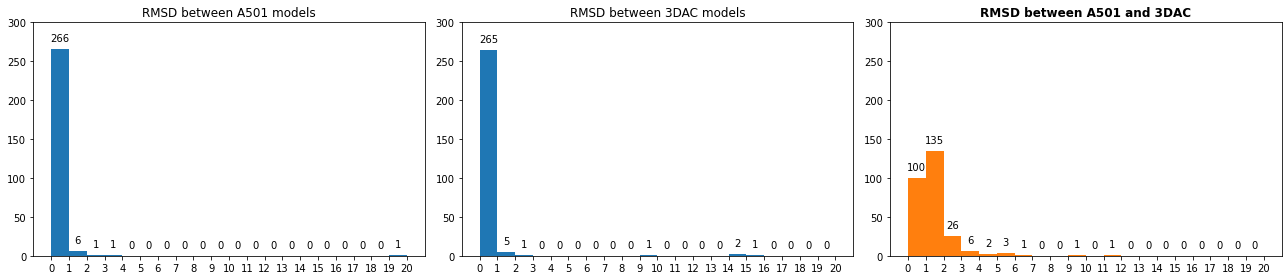

In [8]:
plt.figure(figsize=(18,4))

plt.subplot(131)
c = plt.hist(rmsd_list_A501_inside,bins=np.arange(0,21))
plt.title("RMSD between A501 models")
plt.xticks(np.arange(0,21,1))
for i in range(len(c[0])):
    plt.text(c[1][i]+1/2,c[0][i]+10,"%d"%(c[0][i]),ha="center")
plt.ylim(0,300)


plt.subplot(132)
c = plt.hist(rmsd_list_3DAC_inside,bins=np.arange(0,21))
plt.title("RMSD between 3DAC models")
plt.xticks(np.arange(0,21,1))
for i in range(len(c[0])):
    plt.text(c[1][i]+1/2,c[0][i]+10,"%d"%(c[0][i]),ha="center")
plt.ylim(0,300)


plt.subplot(133)
c = plt.hist(avaiable_DF["RMSD"],bins=np.arange(0,21),color="tab:orange")
plt.title("RMSD between A501 and 3DAC",fontweight="heavy")
plt.xticks(np.arange(0,21,1))
for i in range(len(c[0])):
    plt.text(c[1][i]+1/2,c[0][i]+10,"%d"%(c[0][i]),ha="center")
plt.ylim(0,300)

plt.tight_layout()
plt.savefig("Figure/RMSD_full.png")


plt.show()

In [14]:
avaiable_DF["A501_intra_RMSD"] = rmsd_list_A501_inside
avaiable_DF["3DAC_intra_RMSD"] = rmsd_list_3DAC_inside

In [13]:
avaiable_DF.columns

Index(['A501_sequence_id', 'A501_sequence_name', 'A501_sequence',
       'A501_structure_status', '3DAC_sequence_name', '3DAC_sequence_id',
       '3DAC_sequence', 'A501_structure_model_1_score',
       'A501_structure_model_2_score', '3DAC_structure_status',
       '3DAC_structure_model_1_score', '3DAC_structure_model_2_score', 'RMSD',
       'A501_secondary_structure', '3DAC_secondary_structure',
       'A501_disulfide_bond', '3DAC_disulfide_bond', 'A501_salt_bridge',
       '3DAC_salt_bridge', 'A501_SASA', '3DAC_SASA', 'A501_hydrogen_bond',
       '3DAC_hydrogen_bond', 'salt_bridge_diff', 'hydrogen_bond_diff',
       'disulfide_bond_diff', 'A501_secondary_structure_H_Part',
       'A501_secondary_structure_S_Part', 'A501_secondary_structure_L_Part',
       '3DAC_secondary_structure_H_Part', '3DAC_secondary_structure_S_Part',
       '3DAC_secondary_structure_L_Part', 'Function_tag'],
      dtype='object')

In [16]:
avaiable_DF[avaiable_DF["A501_intra_RMSD"] > 3]

,A501_sequence_id,A501_sequence_name,A501_sequence,A501_structure_status,3DAC_sequence_name,3DAC_sequence_id,3DAC_sequence,A501_structure_model_1_score,A501_structure_model_2_score,3DAC_structure_status,...,disulfide_bond_diff,A501_secondary_structure_H_Part,A501_secondary_structure_S_Part,A501_secondary_structure_L_Part,3DAC_secondary_structure_H_Part,3DAC_secondary_structure_S_Part,3DAC_secondary_structure_L_Part,Function_tag,A501_intra_RMSD,3DAC_intra_RMSD
20,A501_023,WP_050001919.1,MAKVTDMVLWDKPGEKVLLLGNQAIARGALEANIAVYAAYPGTPSS...,True,Chromosome1_390,3DAC_067,MARIGTILGEPGERLLLMGNEAIARGVLEADAAVASTYPGTPSSEI...,94.953139,92.180039,True,...,0,0.452160,0.152778,0.395062,0.461069,0.174046,0.364885,Energy production and coversion,19.963568,1.930011
176,A501_182,WP_050003228.1,MGLVMWLRTGLLMAILTGLLMGIGYLFGGPNVAFMMFLFSMLFNFI...,True,Chromosome1_478,3DAC_084,MRDIISIEDAINQSRIKTVLLFILMFLISAAFGLAVGYLTGDMTWG...,82.478333,82.484271,True,...,0,0.726027,0.051370,0.222603,0.735484,0.048387,0.216129,Biological process,3.630634,0.370525


In [17]:
avaiable_DF[avaiable_DF["3DAC_intra_RMSD"] > 3]

,A501_sequence_id,A501_sequence_name,A501_sequence,A501_structure_status,3DAC_sequence_name,3DAC_sequence_id,3DAC_sequence,A501_structure_model_1_score,A501_structure_model_2_score,3DAC_structure_status,...,disulfide_bond_diff,A501_secondary_structure_H_Part,A501_secondary_structure_S_Part,A501_secondary_structure_L_Part,3DAC_secondary_structure_H_Part,3DAC_secondary_structure_S_Part,3DAC_secondary_structure_L_Part,Function_tag,A501_intra_RMSD,3DAC_intra_RMSD
120,A501_125,WP_050002783.1,MALEKLGKALNNALRKLARAGTVDEAMIKEIVRDIQRALLQADVNV...,True,Chromosome1_827,3DAC_165,MFADLSDKLVNMLNSLRKKGKLTKEDIDKFLKNLKMVLLASDVGFD...,83.255502,81.443989,True,...,0,0.611607,0.075893,0.312500,0.597802,0.085714,0.316484,Transporter,0.332714,15.094344
229,A501_248,WP_050003611.1,MGKGLLKRYLEYPILWKILYGLILGAVFGLIAGHYGYAEAVKTYIK...,True,Chromosome1_7,3DAC_001,MAQKKGSSQKLLVWILVGFALGIVGGLILGKDNVIWVAWMGDVFIR...,84.690956,86.670878,True,...,0,0.813953,0.000000,0.186047,0.833741,0.000000,0.166259,Transporter,0.214555,9.569176
246,A501_265,WP_050003710.1,MCGIIGYIGDRKACEVIVRGLKRLEYRGYDSVGVVTEEDGKLYIKK...,True,Chromosome1_752,3DAC_146,MCGIVGYIGTDKKVPVIIDALKRLEYRGYDSSGIALLMEDGSVVIE...,94.494044,93.948540,True,...,0,0.464345,0.213930,0.321725,0.453809,0.228525,0.317666,Biosynthesis and metabolism,0.242440,14.090260
256,A501_285,WP_050003893.1,MEDISQYLDEFLADARDRIDSLSNAILTLEKIVKEGGSEEEKKAMI...,True,Chromosome1_1103,3DAC_217,MSEIDINEYLPVFIDEAREYLQILNDKLLILEEHPGDLDAIREIFR...,78.565646,77.509228,True,...,0,0.434395,0.231847,0.333758,0.440922,0.221902,0.337176,Signal transduction and Cell motility,1.825936,14.129683


In [18]:
avaiable_DF[avaiable_DF["RMSD"] > 3]

,A501_sequence_id,A501_sequence_name,A501_sequence,A501_structure_status,3DAC_sequence_name,3DAC_sequence_id,3DAC_sequence,A501_structure_model_1_score,A501_structure_model_2_score,3DAC_structure_status,...,disulfide_bond_diff,A501_secondary_structure_H_Part,A501_secondary_structure_S_Part,A501_secondary_structure_L_Part,3DAC_secondary_structure_H_Part,3DAC_secondary_structure_S_Part,3DAC_secondary_structure_L_Part,Function_tag,A501_intra_RMSD,3DAC_intra_RMSD
2,A501_003,WP_042693005.1,MKVVRFGVSVPEELLEKFDRIIEEKGYVNRSEAIRDLMRDFIIRHE...,True,Chromosome1_210,3DAC_024,MRFTVSVDDEIGAFIDSLVKEYGYASRSELIRDLAREKKAELEVGD...,95.654313,95.708373,True,...,0,0.420290,0.282609,0.297101,0.461538,0.292308,0.246154,Biological process,0.101816,0.445795
48,A501_051,WP_050002087.1,MSDFGVLALLPPLVAIVLAIWTKRVILALFAGVWIGGVMVAGGNPI...,True,Chromosome1_128,3DAC_019,MTRRRVTWILAVSIGIMLLALPFWAYAADASSKFSYGFWALLPPTI...,86.224923,87.648775,True,...,0,0.789855,0.000000,0.210145,0.798305,0.000000,0.201695,Transporter,2.388762,0.806335
70,A501_073,WP_050002197.1,MFSLGGFSGGKDYENKTWDVLIIGAGPAGFTAAIYAARFGLETLII...,True,Chromosome1_202,3DAC_023,MAVDYDVLIVGAGPGGLTAGLYAARYGLKTAIVDKGMPGGALLELD...,92.251828,92.066001,True,...,1,0.308157,0.250755,0.441088,0.308442,0.285714,0.405844,Biological process,0.153802,0.215911
81,A501_084,WP_050002358.1,MKVERVKGTRDFLPGEMAKRRWVLDKIRETFERYNFHEVLTPTFEY...,True,Chromosome1_934,3DAC_182,MKTPKGMRDILPPDGELWRRTENILALIARLYGYKEIRTPILEYSF...,94.440227,93.988889,True,...,0,0.480460,0.204598,0.314943,0.454327,0.213942,0.331731,Biological process,0.340850,0.236969
100,A501_104,WP_050002625.1,MLSGDRKEKALKKLRKDFRSGLYSYLVLSLLEKEGELHGYAIRKRL...,True,Chromosome1_986,3DAC_193,MPGRRGVGRGMRWGGYGGWFLKLLLLLLIRNEPSHGYDLAAKLAPF...,94.513149,94.439197,True,...,0,0.700000,0.133333,0.166667,0.580645,0.096774,0.322581,Biological process,0.366167,0.279794
120,A501_125,WP_050002783.1,MALEKLGKALNNALRKLARAGTVDEAMIKEIVRDIQRALLQADVNV...,True,Chromosome1_827,3DAC_165,MFADLSDKLVNMLNSLRKKGKLTKEDIDKFLKNLKMVLLASDVGFD...,83.255502,81.443989,True,...,0,0.611607,0.075893,0.312500,0.597802,0.085714,0.316484,Transporter,0.332714,15.094344
129,A501_134,WP_050002839.1,MKVGVVFGVSELANPKAFEKRVSEFLTALAKDFEVVGGFVLSSKGD...,True,Chromosome1_1066,3DAC_215,MFFAYSDLHNPQIIEKLKAMFHSIPSDNLSTVAVLTGGAEEKFLRA...,96.469610,96.583097,True,...,-1,0.442786,0.256219,0.300995,0.444444,0.248062,0.307494,Function unknown,0.379272,0.193555
181,A501_189,WP_050003288.1,MDVFPIFLLILGLLVIVLDMMVSAFITPVGVAFAVLGLLLGFGWKF...,True,Chromosome1_378,3DAC_060,MGHFHIALWNAYFLILLGIAIVVLDLFTVLFLTPIGVALIVWGILD...,82.533078,80.643773,True,...,0,0.517986,0.266187,0.215827,0.536913,0.268456,0.194631,Biological process,1.168962,0.744192
185,A501_193,WP_050003306.1,MRSEIKALTIILLASFGLSAVVLYLLGIPDFIPKFYALAMSDSINP...,True,Chromosome1_1357,3DAC_278,MDFWLSLWGLALADSVNPCCINALLVMLTLNIIKGSPVQALKSGLA...,68.470093,64.417176,True,...,0,0.912863,0.000000,0.087137,0.903509,0.000000,0.096491,Function unknown,1.992641,0.904308
208,A501_227,WP_050003472.1,MLPKNYDPNEIEPKWQKFWLDEKIYKYELDEKRPSYAIDTPPPFTS...,True,Chromosome1_386,3DAC_065,MPMDIPKHIDPKDIEGKWYERWKKDKVFHAEVDWSKKPFSMVIPPP...,92.967231,93.510210,True,...,0,0.475281,0.192135,0.332584,0.485149,0.162816,0.352035,Biological process,0.347128,0.807968
